# Case study for an experiment that employs a naturalistic setting: COSMIC

In [1]:
import os
import re
import numpy as np
from scipy import ndimage

import sys
import pickle
import json
import tables

import importlib.util #import from superordinate folder
spec =importlib.util.spec_from_file_location("helper",str(re.search("(.*/)",os.getcwd()).groups(0)[0])+"helper.py")
helper = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helper)

In [2]:
#Now you can zoom
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
with open("child_static_size.json") as fh:
    json = json.load(fh)

In [4]:
mot = tables.open_file("cosmic.mot")

In [5]:
data = mot.root.motion_tensor

In [6]:
hist = helper.weighted_histograms(data, roi = json)

0.0
0.001906250595703311
0.003812501191406622
0.005718751787109934
0.007625002382813244
0.009531252978516556
0.011437503574219868
0.013343754169923177
0.015250004765626489
0.0171562553613298
0.019062505957033113
0.020968756552736424
0.022875007148439735
0.024781257744143047
0.026687508339846355
0.028593758935549666
0.030500009531252977
0.03240626012695629
0.0343125107226596
0.036218761318362915
0.038125011914066226
0.04003126250976954
0.04193751310547285
0.04384376370117616
0.04575001429687947
0.04765626489258278
0.049562515488286094
0.0514687660839894
0.05337501667969271
0.05528126727539602
0.05718751787109933
0.05909376846680264
0.061000019062505954
0.06290626965820927
0.06481252025391258
0.06671877084961589
0.0686250214453192
0.07053127204102251
0.07243752263672583
0.07434377323242913
0.07625002382813245
0.07815627442383576
0.08006252501953907
0.08196877561524238
0.0838750262109457
0.085781276806649
0.08768752740235232
0.08959377799805562
0.09150002859375894
0.09340627918946225
0.09

0.8215940067481271
0.8235002573438304
0.8254065079395337
0.827312758535237
0.8292190091309404
0.8311252597266436
0.833031510322347
0.8349377609180503
0.8368440115137536
0.8387502621094569
0.8406565127051602
0.8425627633008635
0.8444690138965668
0.8463752644922702
0.8482815150879734
0.8501877656836768
0.8520940162793801
0.8540002668750833
0.8559065174707867
0.85781276806649
0.8597190186621934
0.8616252692578966
0.8635315198536
0.8654377704493033
0.8673440210450066
0.8692502716407099
0.8711565222364132
0.8730627728321165
0.8749690234278198
0.8768752740235232
0.8787815246192264
0.8806877752149298
0.8825940258106331
0.8845002764063363
0.8864065270020397
0.888312777597743
0.8902190281934463
0.8921252787891496
0.894031529384853
0.8959377799805562
0.8978440305762595
0.8997502811719629
0.9016565317676661
0.9035627823633695
0.9054690329590728
0.9073752835547761
0.9092815341504794
0.9111877847461828
0.913094035341886
0.9150002859375893
0.9169065365332927
0.918812787128996
0.9207190377246993
0.92

In [7]:
import matplotlib.pyplot as plt

In [8]:
hist = ndimage.gaussian_filter(hist[:,],10)
motion_1d = np.mean(hist,axis =0)

left = np.sum(hist[0:5,:],axis=0)+np.sum(hist[31:,:],axis=0)
down = np.sum(hist[5:14,:],axis=0)
right = np.sum(hist[14:23,:],axis=0)
up = np.sum(hist[23:31,:],axis=0)

In [9]:
path = os.getcwd()+"/cosmic.eeg"
electrode_names= ['Fz_1', 'F3_1', 'F7_1', 'F9_1', 'FT7_1', 'FC3_1', 'FC1_1', 'Cz_1',
       'C3_1', 'T7_1', 'CP3_1', 'Pz_1', 'P3_1', 'P7_1', 'PO9_1', 'O1_1',
       'O2_1', 'PO10_1', 'P8_1', 'P4_1', 'CP4_1', 'TP10_1', 'T8_1',
       'C4_1', 'FT8_1', 'FC4_1', 'FC2_1', 'F4_1', 'F8_1', 'F10_1', 'V1_1',
       'V2_1', 'Fz_2', 'F3_2', 'F7_2', 'F9_2', 'FT7_2', 'FC3_2', 'FC1_2',
       'Cz_2', 'C3_2', 'T7_2', 'CP3_2', 'Pz_2', 'P3_2', 'P7_2', 'PO9_2',
       'O1_2', 'O2_2', 'PO10_2', 'P8_2', 'P4_2', 'CP4_2', 'TP10_2',
       'T8_2', 'C4_2', 'FT8_2', 'FC4_2', 'FC2_2', 'F4_2', 'F8_2', 'F10_2',
       'V1_2', 'V2_2']
vmrk = "cosmic.vmrk"
exclude = []

In [10]:
eegs1 = helper.frequency_bands_to_common_reference(path, participant = 1, electrode_names = electrode_names, vmrk = vmrk, exclude = exclude)
eegs0 = helper.frequency_bands_to_common_reference(path, participant = 0, electrode_names = electrode_names, vmrk = vmrk, exclude = exclude)
eegs = {**eegs1,**eegs0}

/mnt/c/Users/eler/Documents/Cognitive_Science/Bachelorarbeit/Scripts/processing_pipeline/helper.py:292: RuntimeWarning: Mean of empty slice
  reference = np.nanmean(load_eeg(path,participant=participant),axis = 0)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

# Check computed signals and autocorrelation

In [11]:
from scipy import signal

[[1.         0.17143336]
 [0.17143336 1.        ]]


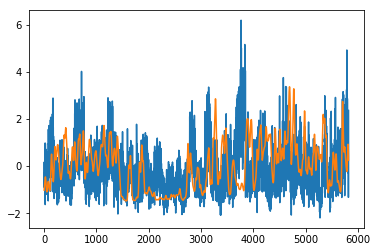

In [12]:
pair = [motion_1d[46142:51961],eegs["alpha_O2_2"][46142:51961]]

pair[0]=pair[0]-pair[0].mean()
pair[1]=pair[1]-pair[1].mean()
pair[1]=pair[1]/pair[1].std()
pair[0]=pair[0]/pair[0].std()

#pair[0]=pair[0]-signal.medfilt(pair[0],3333)


plt.plot(pair[1])
plt.plot(pair[0])
print(np.corrcoef(*pair))

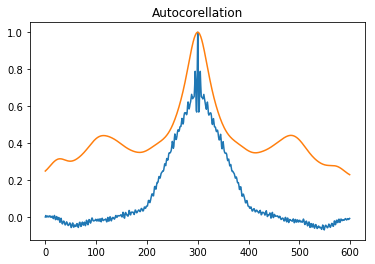

In [13]:
plt.title("Autocorellation")
plt.plot(helper.correlation_shifted(eegs["alpha_T7_1"][46142:51961],eegs["alpha_T7_1"][46142:51961],300)[0])
plt.plot(helper.correlation_shifted(motion_1d[46142:51961],motion_1d[46142:51961],300)[0])

# Crosscorrelation and time-shift analysis

In [14]:
import matplotlib.gridspec as gridspec

................................................................................................................................................................................................................................................................

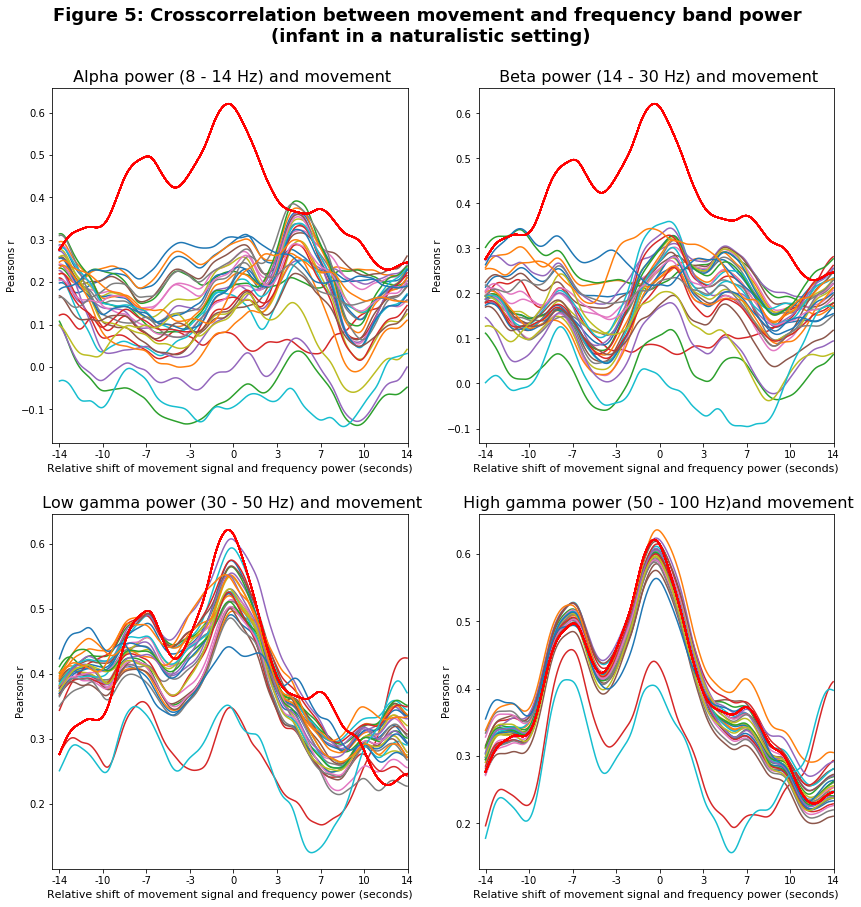

In [15]:
pos_min = 46500
pos_max = 51500

maxshift = 350
corr_p1 = {"alpha":np.zeros(2*maxshift),"beta":np.zeros(2*maxshift),"gamma1":np.zeros(2*maxshift),"gamma2":np.zeros(2*maxshift)}
corr_p2 = {"alpha":np.zeros(2*maxshift),"beta":np.zeros(2*maxshift),"gamma1":np.zeros(2*maxshift),"gamma2":np.zeros(2*maxshift)}

p1_keys = 0
p2_keys = 0
bands = ["alpha","beta","gamma1","gamma2"]

fig = plt.figure(figsize=(14, 14))

fig.suptitle("Figure 5: Crosscorrelation between movement and frequency band power \n(infant in a naturalistic setting)", fontsize=18, fontweight='bold')
gs = gridspec.GridSpec(2, 2,width_ratios=[1, 1],height_ratios=[1,1])

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

axes = [ax1,ax2,ax3,ax4]


titles = []
titles.append(" Alpha power (8 - 14 Hz) and movement")
titles.append(" Beta power (14 - 30 Hz) and movement")

titles.append(" Low gamma power (30 - 50 Hz) and movement")
titles.append(" High gamma power (50 - 100 Hz)and movement")

for k in eegs.keys():
    print(".", end="")
    for band, ax, title in zip(bands,axes, titles):
        ax.set_title(title, fontsize = 16)
        if re.search(band, k):
            if re.search("_1",k):
                if False:
                    corr = helper.correlation_shifted(motion_1d[pos_min:pos_max],eegs[k][pos_min:pos_max],maxshift=maxshift)[0]
                corr_p1[band] += corr
                p1_keys += 1

                ax.plot(corr, color = "red")
            elif re.search("_2",k) and True:
                corr = helper.correlation_shifted(motion_1d[pos_min:pos_max],eegs[k][pos_min:pos_max],maxshift=maxshift)[0]
                corr_p2[band] += corr
                ax.plot(corr)
                p2_keys += 1
                
        ax.set_xlim(-14,14)

        ax.set_xticks(np.linspace(0,2*maxshift,9))
        ax.set_xticklabels(np.linspace(-maxshift/25,maxshift/25,9, dtype =np.int32))
        
        ax.set_xlabel("Relative shift of movement signal and frequency power (seconds)", fontsize = "11")
        ax.set_ylabel("Pearsons r")
        
fig.subplots_adjust(top=0.90, wspace = 0.2, hspace=.2)
#fig.tight_layout()

#corr_p1 /= p1_keys
#corr_p2 /= p2_keys
            
#plt.plot(helper.correlation_shifted(motion_1d[46500:51500],eegs["alpha_Fz_1"][46500:51500],maxshift=400)[0])
#plt.plot(helper.correlation_shifted(motion_1d[46500:51500],eegs["alpha_Fz_2"][46500:51500],maxshift=400)[0])

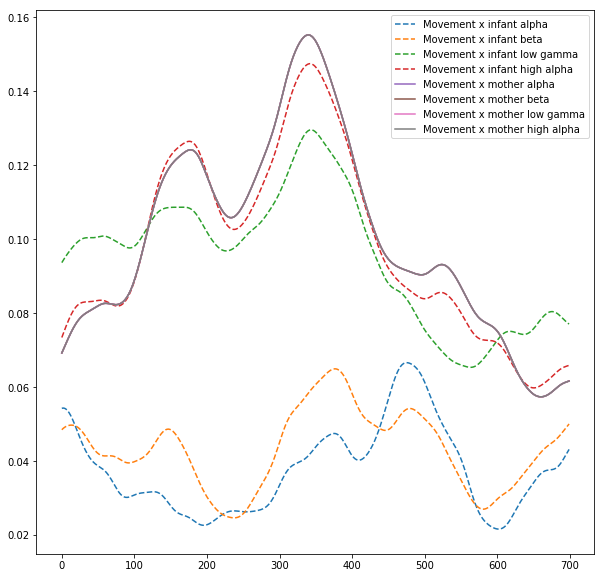

In [16]:
fig =plt.figure(figsize=(10,10))
plt.plot(corr_p2["alpha"]/128, linestyle = "dashed")
plt.plot(corr_p2["beta"]/128, linestyle = "dashed")
plt.plot(corr_p2["gamma1"]/128, linestyle = "dashed")
plt.plot(corr_p2["gamma2"]/128, linestyle = "dashed")


plt.plot(corr_p1["alpha"]/128)
plt.plot(corr_p1["beta"]/128)
plt.plot(corr_p1["gamma1"]/128)
plt.plot(corr_p1["gamma2"]/128)

plt.legend(("Movement x infant alpha","Movement x infant beta","Movement x infant low gamma",
           "Movement x infant high alpha","Movement x mother alpha","Movement x mother beta",
           "Movement x mother low gamma", "Movement x mother high alpha"),
           loc='upper right')

[[1.         0.17993806]
 [0.17993806 1.        ]]


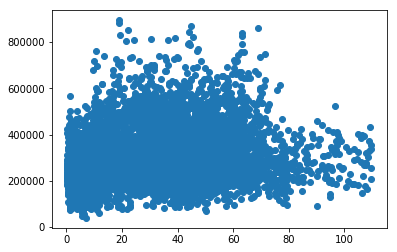

In [17]:
pair = (motion_1d[46142:51961],eegs["alpha_F7_2"][46142:51961])
plt.scatter(*pair)

print(np.corrcoef(*pair))

# Assemble Dataset

In [18]:
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from RegscorePy import aic
import scipy.signal

from IPython.display import clear_output


In [19]:
period_of_interest = [46142,51961]

In [20]:
datadict = {}
datadict["movement"] = motion_1d

In [21]:
datadict["up_movement"] = up
datadict["left_movement"] = left
datadict["right_movement"] = right
datadict["down_movement"] = down

In [22]:
for k,v in eegs1.items():
    datadict[k] = v

In [23]:
#Add shifted movement signals
maxshift = 4*25 #discard initial 3 seconds 
shift_values = np.array(np.linspace(-maxshift,maxshift,9),dtype=np.int)
shift_postfixes = ["p"+str(int(x)) if x>=0 else "n" +str(int(-x)) for x in shift_values]
for shift,name in zip (shift_values,["shift_"+x for x in shift_postfixes]):
    #Add zeros in the beginning (75) to have data from before the recording started for shift back
    move = list(np.zeros(maxshift))
    move.extend(list(datadict['movement']))
    move = np.array(move)
    
    #select subperiod according to maxshift
    datadict[name] = move[shift+maxshift:]

In [24]:
#strip down to same length
minsize = np.min(np.array([x.shape[0] for x in datadict.values()]))
for k, v in datadict.items():
    datadict[k] = v[:minsize]

In [25]:
df = pd.DataFrame(datadict).loc[period_of_interest[0]:period_of_interest[1]]
df

,movement,up_movement,left_movement,right_movement,down_movement,alpha_Fz_2,beta_Fz_2,gamma1_Fz_2,gamma2_Fz_2,alpha_F3_2,...,gamma2_V2_2,shift_n100,shift_n75,shift_n50,shift_n25,shift_p0,shift_p25,shift_p50,shift_p75,shift_p100
46142,10.563545,53.472227,102.830915,95.104348,128.880120,208577.404420,344210.141037,397350.803887,1.391940e+06,208305.976759,...,1.417302e+06,0.000000,0.000000,0.000000,0.215250,10.563545,23.026505,8.978640,18.301930,10.819918
46143,11.217567,57.498334,108.819408,101.392113,136.122569,123204.686004,461882.462363,341386.622274,1.395579e+06,117799.563272,...,1.386596e+06,0.000000,0.000000,0.000000,0.279581,11.217567,22.754222,8.934868,18.573394,10.547699
46144,11.861449,61.606210,114.641641,107.660561,143.103757,156207.566200,375324.408000,281631.270451,1.339560e+06,127764.056985,...,1.346510e+06,0.000000,0.000000,0.000000,0.359787,11.861449,22.367806,8.939140,18.769371,10.313274
46145,12.495689,65.804342,120.299502,113.917439,149.823522,224918.579849,343553.150671,324446.510771,1.184850e+06,239342.955896,...,1.203046e+06,0.000000,0.000000,0.000000,0.458741,12.495689,21.874163,8.990313,18.886733,10.117889
46146,13.121916,70.105684,125.806732,120.179800,156.296745,229627.564385,367171.709727,281132.851268,1.331994e+06,264949.680407,...,1.309186e+06,0.000000,0.000000,0.000000,0.579416,13.121916,21.283127,9.087741,18.924122,9.963386
46147,13.742794,74.527395,131.187846,126.473348,162.551997,198129.913796,424302.471314,255560.558542,1.482048e+06,197942.099856,...,1.523139e+06,0.000000,0.000000,0.000000,0.725109,13.742794,20.607037,9.231159,18.881919,9.851642
46148,14.361568,79.087704,136.473842,132.828085,168.626821,191434.470113,343408.747550,272534.833555,1.373242e+06,197283.274707,...,1.409620e+06,0.000000,0.000000,0.000000,0.899127,14.361568,19.860207,9.420646,18.762318,9.785023
46149,14.981768,83.804305,141.699865,139.275221,174.564274,190814.259739,356134.667569,313648.864333,1.276380e+06,143679.929387,...,1.282108e+06,0.000000,0.000000,0.000000,1.104648,14.981768,19.058410,9.656345,18.569019,9.766741
46150,15.606489,88.690081,146.898210,145.840557,180.404757,174386.340595,407915.591326,335857.304201,1.253549e+06,184368.182289,...,1.274391e+06,0.000000,0.000000,0.000000,1.344527,15.606489,18.218208,9.938280,18.307434,9.800776
46151,16.238153,93.752532,152.096253,152.542229,186.182490,187888.502923,350207.154387,284798.121658,1.140014e+06,176346.674189,...,1.144347e+06,0.000000,0.000000,0.000000,1.621572,16.238153,17.356261,10.266446,17.984101,9.892116


# Polynomial regression

In [26]:
def polynomial_regression(X_train,X_test, Y_train,Y_test ,degree):
    """Polynomial regression model for the given degree
    Args:
        X_train: Training data; 2 dimensional where each row represents one feature
        Y_train: Training data to predict, 1dimensional
        X_test: Test dataset used to evaluate performance by predicting Y_test. 2D data.
        Y_test: Test dataset target values predicted by X_test. 1D data.
    Returns:
        Akaike criterion for the test dataset
        Pearsons r for the correlaion between prediction and values of the test data
        R-squared for the test Data
        R-squared for the training Data
        Tuple of fitted RegressionModel and polynominal features that are required for future predictions                             
    """

    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)# transform existing features to higher degree features.
    poly_model = LinearRegression()  # fit the transformed features to Linear Regression
    poly_model.fit(X_train_poly, Y_train)

    y_train_predicted = poly_model.predict(X_train_poly)# predicting on training data-set
    y_test_predict = polynominal_predict(X_test,poly_model,poly_features)#poly_model.predict(poly_features.fit_transform(X_test))# predicting on test data-set
    
    #Calculate performance measures
    feature_names = poly_features.get_feature_names(X_train.columns)
    #aic.aic(np.array(Y_test).flatten(),np.array(y_test_predict).flatten(),len(feature_names))
    #np.corrcoef(Y_test, y_test_predict)[0,1]
    r2_test = r2_score(Y_test, y_test_predict)
    r2_train = r2_score(Y_train, y_train_predicted)
    
    
    return r2_test, r2_train, (Y_test,y_test_predict), (poly_model,poly_features)

def polynominal_predict(data, poly_model, poly_features):
    """ Computes prediction for given data and the polynomonal model as well as the features that result from fit
    Args:
        data: Data of shape N x NumberOfPredictors where NumberOfPredictors matches the explaining variables
                used during prediction. E.g. An array containing lines of predictors.
        poly_model: The fitted regression model (returned by polynominal_regression)
        poly_features: The polinominal features used during fitting (returned by polynominal regression)
        
    Returns:
        Predictions
    """
    return poly_model.predict(poly_features.fit_transform(data))

def leave_free_split(x,y,test_size =.2,chunksize = 25, n=0):
    """ Splits into training and test data. Leaves leave_free chunks of chunksize free around each test chunk
        x: Data (2D)
        y: Data (1D)
        test_size: proportion of training to test data. Note that the ratio is not accurately matched
        chunksize: Size of the chunks of data that are assembled into trianing and test data
    """
    columns = x.columns.values

    #test_size = .2 --> every fifth chunk is test data
    x = np.array(x)
    y = np.array(y)
    
    #Select subset for 10 fold crossvalidation
    length = x.shape[0]
    
    x = np.append(x,x,axis = 0)
    y = np.append(y,y, axis = 0)
    
    y = y[n*length//10:(n*length//10)+length]
    x = x[n*length//10:(n*length//10)+length]

    
    #Combine x and y
    np.append(x,y, axis=1)
    chunks = x.shape[0]//chunksize
    
    chunks = np.array(np.array_split(np.append(x,y, axis=1),chunks))#now we have as many chunks as possible
    
    #next we obtain decriptive-labels for the indices of the chunks
    description = np.ndarray((len(chunks)),dtype=np.object)
    description[:] = "training"

    leave_free = 1
    stepsize = int((1/test_size) + leave_free+1)
    
    description[stepsize-1::stepsize] = "free"

    description[stepsize::stepsize] = "test"
    
    
    #now we can select training and test data accordingly
    training = chunks[description == "training"]
    test = chunks[description == "test"]
    
    
    train_x = np.concatenate(training)[:,0:-1]
    train_y = np.concatenate(training)[:,-1]
    test_x = np.concatenate(test)[:,0:-1]
    test_y = np.concatenate(test)[:,-1]
    
    return pd.DataFrame(train_x, columns = columns), pd.DataFrame(test_x, columns = columns), pd.DataFrame(train_y), pd.DataFrame(test_y)

In [27]:
quality_measures = []#The resulting measures and their heading (used for printout later)
headers = ["Model", "Predicted Channel", "Polynominal degree","R-squared (leave-free, test)","R-squared (leave-free, training)",
          "R-squared (test)","R-squared (training)", "P-test"]

models = []#the datasets that make up the model
model_names = []

targets = []
target_names = []

In [28]:
#Model 1
X = df["movement"]#head hands body
models.append(X)
model_names.append("1D-movement score")

#Model 2
X = df.loc[:,"movement":"down_movement"]
models.append(X)
model_names.append("1D-movement scores for all directions")

#Model 3
X = df.loc[:,"shift_n100":"shift_p100"]#includes shift 0
models.append(X)
model_names.append("1D-movement scores shifted")

In [29]:
#Target values (electrodes)
for k,v in df.loc[:,'alpha_F7_2':"gamma2_O2_2"].items():
    target_names.append(k)
    targets.append(v)

In [30]:
#For all models, for all electrodes compute Polynominal regression for degree 1 (Linear regression) and degree 2 (quadratic)
start_time = time.time()

for X, name in zip(models, model_names):#Different models
    for Y, target_name in zip(targets, target_names):#All electrodes
        before_regression = time.time()
        for degree in [1,2]:#Polinominal degree 1 and 2
            #Compute regression and save results                                             
                
            #1. Subsampling that accounts for autocorrelation & do 10 fold crossvalidation
            r2_test = 0
            r2_train = 0
            p_test = 0
            for n in range(10):
                x_train, x_test, y_train, y_test = leave_free_split(pd.DataFrame(X), pd.DataFrame(Y), .2, chunksize=150, n=n)
                curr_r2_test, curr_r2_train, test_and_prediction, model = polynomial_regression(x_train,x_test, y_train,y_test, degree)
                r2_test += curr_r2_test 
                r2_train += curr_r2_train
                
                p_test += scipy.stats.linregress(np.array(test_and_prediction[0]).flatten(),np.array(test_and_prediction[1]).flatten())[3]
                
                
            r2_test /= 10
            r2_train /= 10
            p_test/=10
            
            #2. Random subsample
            x_train1, x_test1, y_train1, y_test1 = train_test_split(pd.DataFrame(X), pd.DataFrame(Y), test_size = 0.2, random_state=5)
            r2_test1, r2_train1, test_and_prediction1, model = polynomial_regression(x_train1,x_test1, y_train1,y_test1, degree)
            quality_measures.append([name,target_name,degree,r2_test,r2_train,r2_test1,r2_train1,p_test])
            
            
        total_time_estimate = (time.time()-before_regression)*len(models)*len(targets)
        elapsed = start_time-time.time()
        clear_output()
        print("Total time estimate " + str(total_time_estimate))
        print("Elapsed " + str(elapsed))
        print("Remaining " + str(total_time_estimate+elapsed))

Total time estimate 95.58345794677734
Elapsed -65.09058141708374
Remaining 30.492876529693604


In [31]:
quality_measures = pd.DataFrame(quality_measures, columns = headers)

In [32]:
len(np.where(quality_measures["P-test"]*25*4<0.05)[0])/len(quality_measures["P-test"])

0.40555555555555556

In [33]:
print("Number of significant regression results")
len(np.where(quality_measures["P-test"]<0.05)[0])/len(quality_measures["P-test"])

Number of significant regression results


0.6861111111111111

In [34]:
#quality_measures.loc[quality_measures["Model"]== "1D-movement score"]
quality_measures

,Model,Predicted Channel,Polynominal degree,"R-squared (leave-free, test)","R-squared (leave-free, training)",R-squared (test),R-squared (training),P-test
0,1D-movement score,alpha_F7_2,1,-0.036071,0.033219,0.040213,0.029764,3.682162e-02
1,1D-movement score,alpha_F7_2,2,-0.012166,0.073527,0.065648,0.071919,3.504511e-02
2,1D-movement score,beta_F7_2,1,-0.018896,0.045856,0.046015,0.037575,2.824461e-02
3,1D-movement score,beta_F7_2,2,0.013038,0.092099,0.075099,0.086397,4.990057e-02
4,1D-movement score,gamma1_F7_2,1,0.137749,0.202569,0.210991,0.195299,3.883026e-07
5,1D-movement score,gamma1_F7_2,2,0.235809,0.309353,0.303971,0.304492,1.464223e-12
6,1D-movement score,gamma2_F7_2,1,0.156425,0.272275,0.282336,0.268473,3.815481e-09
7,1D-movement score,gamma2_F7_2,2,0.280319,0.398144,0.401890,0.396109,3.194920e-17
8,1D-movement score,alpha_F9_2,1,-0.046620,0.006498,0.010399,0.003137,1.345399e-01
9,1D-movement score,alpha_F9_2,2,-0.034871,0.026081,0.024127,0.023709,6.392255e-02


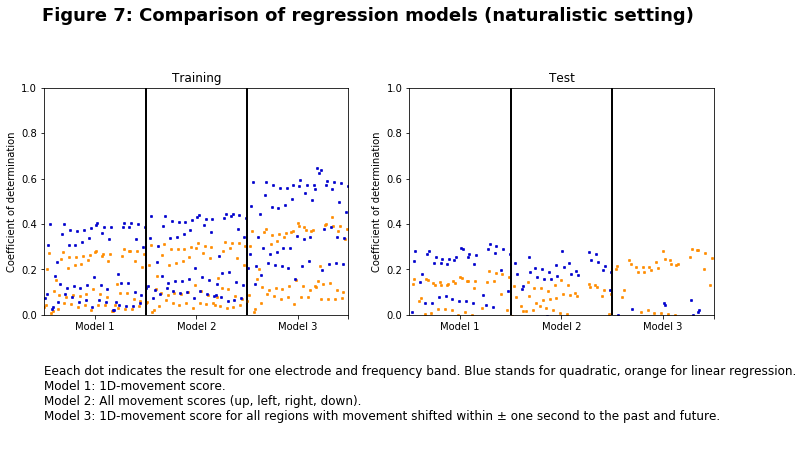

In [37]:
gs = gridspec.GridSpec(2,2,width_ratios=[1,1], height_ratios = [1,.4])

fig = plt.figure(figsize = (12,7))
fig.suptitle("Figure 7: Comparison of regression models (naturalistic setting)", fontsize = 18, fontweight='bold')

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax_subtext = plt.subplot(gs[1,:])
ax_subtext.axis("off")

axes = [ax1,ax2]

modelnames = ["1D-movement score","1D-movement scores for all directions","1D-movement scores shifted"]
measures = ["R-squared (leave-free, training)","R-squared (leave-free, test)"]

titles = ["Training","Test"]

for ax, measure,title in zip(axes,measures,titles):
    for modelname in modelnames:
        current_model = quality_measures.loc[quality_measures["Model"]== modelname]
        linear_model = current_model[0::2]
        quadratic_model = current_model[1::2]
        
        ax.set_title(title)


        ax.plot(linear_model[measure],linestyle="",marker="X", markersize = 2, color = "darkorange")
        ax.plot(quadratic_model[measure],linestyle="",marker="X", markersize = 2, color = "mediumblue")
        ax.set_ylim(0,1)
        
        ax.set_xlim(0,)
        ax.set_ylabel("Coefficient of determination")

        
        ax.axvline(x=120, color='k')
        ax.axvline(x=240, color='k')
        ax.set_xticks([60,180,300,360])
        ax.set_xticklabels(["Model 1","Model 2","Model 3"])
        #print(linear_model)

ax_subtext.text(0,.2,"Eeach dot indicates the result for one electrode and frequency band. Blue stands for quadratic, orange for linear regression.\n"
            +"Model 1: 1D-movement score. \n"
            +"Model 2: All movement scores (up, left, right, down).\n"
            +"Model 3: 1D-movement score for all regions with movement shifted within ± one second to the past and future.",
            fontsize = 12)
fig.subplots_adjust(top=0.82, wspace = .2, hspace=.2)


# Some checks of shifted_correlation with random numbers and autocorrlated samples

https://stackoverflow.com/questions/33898665/python-generate-array-of-specific-autocorrelation

In [ ]:
plt.plot(helper.correlation_shifted(np.random.randn(1000),np.random.randn(1000),100)[0])

In [ ]:
def sample_signal(n_samples, corr, mu=2, sigma=1):
    assert 0 < corr < 1, "Auto-correlation must be between 0 and 1"

    # Find out the offset `c` and the std of the white noise `sigma_e`
    # that produce a signal with the desired mean and variance.
    # See https://en.wikipedia.org/wiki/Autoregressive_model#Example:_An_AR.281.29_process
    c = mu * (1 - corr)
    sigma_e = np.sqrt((sigma ** 2) * (1 - corr ** 2))

    # Sample the auto-regressive process.
    signal = [c + np.random.normal(0, sigma_e)]
    for _ in range(1, n_samples):
        signal.append(c + corr * signal[-1] + np.random.normal(0, sigma_e))

    return np.array(signal)

In [ ]:
a = sample_signal(1000,.5)
b = sample_signal(1000,.5)

In [ ]:
plt.plot(helper.correlation_shifted(a,b,100)[0])